In [6]:
import torch
import matplotlib.pyplot as plt
from glob import glob

from dataset import MyData
from model import Net
from config import device

PATH_TO_DATASET = './CloC/'
IMG_SIZE = (217, 334)

## Pretraining

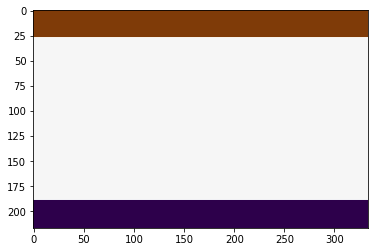

In [2]:
start_img = torch.zeros(IMG_SIZE)
start_img[:IMG_SIZE[0] // 8, :] = -1
start_img[-IMG_SIZE[0] // 8:, :] = 1

plt.imshow(start_img, cmap='PuOr')

In [3]:
dataset = MyData(path_or_img='./CloC/00006.png', data_mode='path', mode_3d='cylinder', radius=1, reduce_fctor=1, need_info=False)
dataset_list = [dataset]


In [4]:
model = Net(dataset_list=dataset_list, lr=1e-2, weight_decay=1e-3)
model.to(device)
model.pretrain(img_size=IMG_SIZE, num_epochs=5000)
model.save_state_dict('./pretrained_model.pt')

Pretraining:  20%|█▉        | 978/5000 [00:03<00:14, 283.87it/s]


KeyboardInterrupt: 

## Train

<All keys matched successfully>

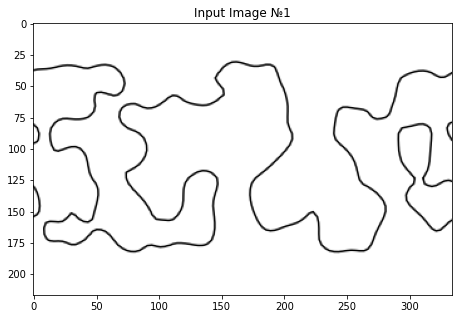

In [2]:
dataset = MyData(path_or_img='./CloC/00006.png', data_mode='path', mode_3d='cylinder', radius=1, reduce_fctor=1, need_info=False)
dataset_list = [dataset]
dataset.show_image()

model = Net(dataset_list=dataset_list, lr=1e-3, weight_decay=1e-3)
model.to(device)

model.load_state_dict(torch.load('./pretrained_model.pt'))
# _ = model.test_model(threshold=0.15, need_plot=True)


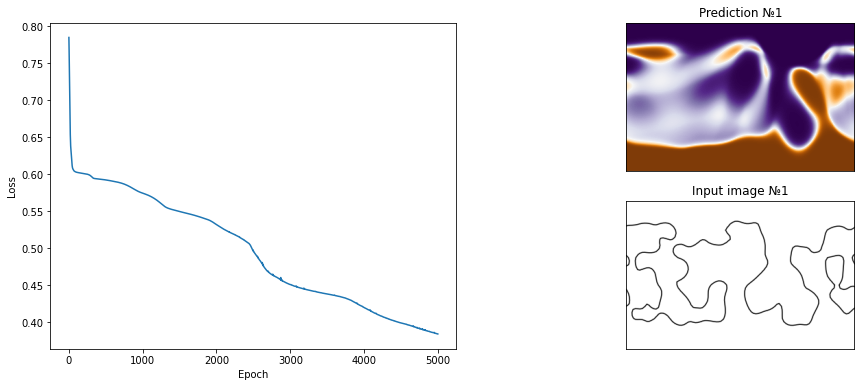

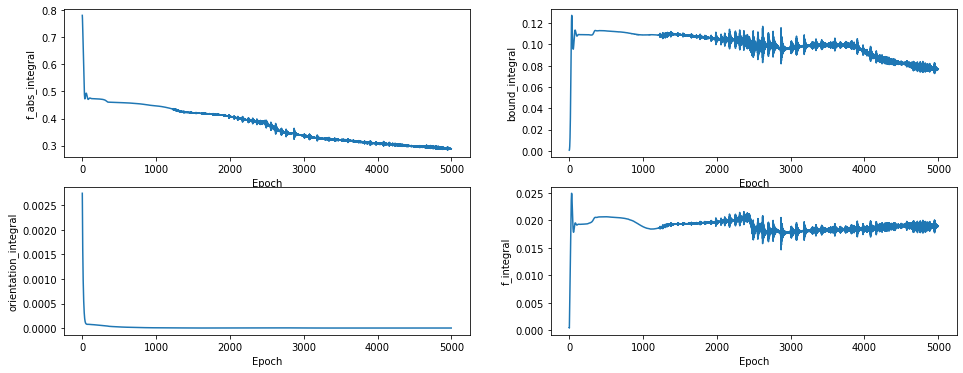

In [3]:
# model = model.restart_model(lr=1e-3)
model.start_training(num_epochs=5e+3, my_weight=0.1, need_save=False, need_plot=True)

In [3]:
model.load_state_dict(torch.load('./model.pth'))

<All keys matched successfully>

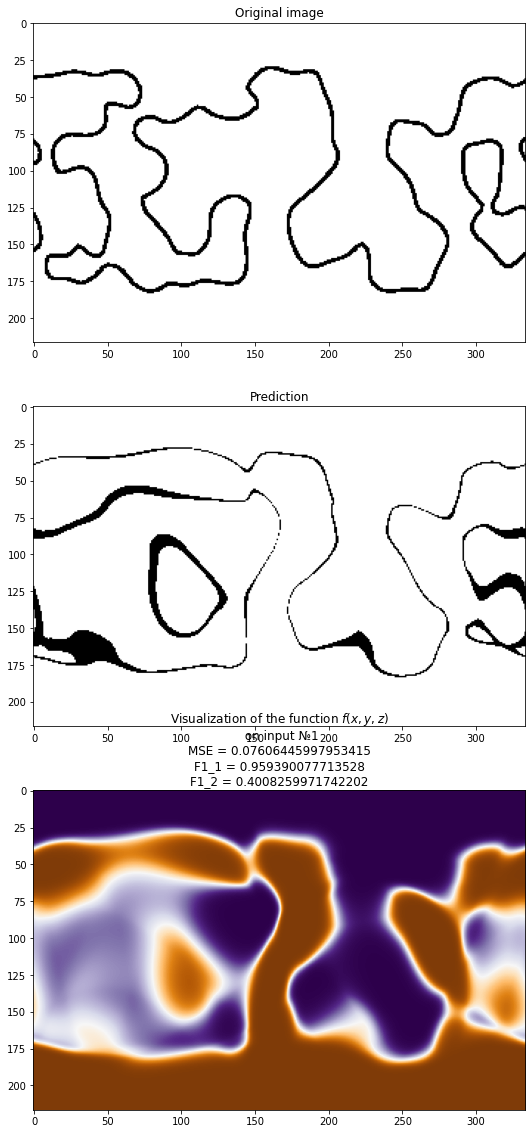

In [4]:
eps = 0.15
prediction_list, mse, f1, f2 = model.test_model(threshold=eps, need_plot=True)

In [11]:
model.save_state_dict('./model.pth')

## Test


In [16]:
# i want to create txt file with results
from tqdm import tqdm
with open('results.txt', 'w') as f:
    for path_to_img in tqdm(glob(PATH_TO_DATASET + '*.png')[:100]):
        dataset = MyData(path_or_img=path_to_img, data_mode='path', mode_3d='cylinder', radius=1, reduce_fctor=1, need_info=False)
        dataset_list = [dataset]
        model = Net(dataset_list=dataset_list, lr=1e-3, weight_decay=1e-3)
        model.to(device)
        model.load_state_dict(torch.load('./pretrained_model.pt'))
        model.start_training(num_epochs=15e+3, my_weight=0.1, need_save=False, need_plot=False)
        mse, f1, f2 = model.test_model_(threshold=0.15)
        f.write(f'{path_to_img[len(PATH_TO_DATASET):]}\nMSE: {mse:.2f} F1: {f1:.2f}, {f2:.2f}\n\n')

    

100%|██████████| 100/100 [00:11<00:00,  8.49it/s]
